In [1]:
import numpy as np
import torch
import MAS_library as MASL #pylians
import redshift_space_library as RSL
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##Per i grafici 3d indagare plotly

from kymatio.torch import HarmonicScattering3D
from kymatio.scattering3d.backend.torch_backend \
    import TorchBackend3D

In [2]:
# file da Quijote: 3D_cubes/fiducial/0 | sono dati di densità
#   in un cubo 128^3, z=0
delta = np.load('df_m_128_CIC_z=0.npy')

In [3]:
# order_0 = np.zeros(1)
# order_0[0] = np.power(np.abs(delta), 0.8).sum()/((1000/140)**3)
# order_0

# HO AGGIUNTO A scattering3d\>frontend\>torch_frontend.py\>HarmonicScatteringTorch3D\>scattering

In [4]:
# %%time

M, N, O = 128, 128, 128
J = 4
L = 4
S = HarmonicScattering3D(J=J, L=L, shape=(M, N, O), sigma_0=0.8, integral_powers=[0.8])

In [5]:
# %%time

# Calculate the scattering transform.
Sx = S.scattering(torch.from_numpy(delta))

In [6]:
print("S shape: ", np.shape(S), "\nSx shape: ", np.shape(Sx))

S shape:  (128, 128, 128) 
Sx shape:  torch.Size([15, 5, 1])


#### Sx scheme (L, J1, J2)

###### (0, 0, 0) & (1, 0, 0) & (2, 0, 0) & (3, 0, 0) & (4, 0, 0)  \
###### (0, 1, 0) & (1, 1, 0) & (2, 1, 0) & (3, 1, 0) & (4, 1, 0)   |
###### (0, 2, 0) & (1, 2, 0) & (2, 2, 0) & (3, 2, 0) & (4, 2, 0)   | -> 1st order
###### (0, 3, 0) & (1, 3, 0) & (2, 3, 0) & (3, 3, 0) & (4, 3, 0)   |
###### (0, 4, 0) & (1, 4, 0) & (2, 4, 0) & (3, 4, 0) & (4, 4, 0)  /
###### (0, 0, 1) & (1, 0, 1) & (...)     & (...)     & (...)
###### (0, 0, 2) & (1, 0, 2) & (...)     & (...)     & (...)
###### (0, 0, 3) & (...)     & (...)     & (...)     & (...)
###### (0, 0, 4) & (...)     & (...)     & (...)     & (...)
###### (0, 1, 2) & (...)     & (...)     & (...)     & (...)
###### (0, 1, 3) & (...)     & (...)     & (...)     & (...)
###### (0, 1, 4) & (...)     & (...)     & (...)     & (...)
###### (0, 2, 3) & (...)     & (...)     & (...)     & (...)
###### (0, 2, 4) & (...)     & (...)     & (...)     & (...)
###### (0, 3, 4) & (1, 3, 4) & (2, 3, 4) & (3, 3, 4) & (4, 3, 4)


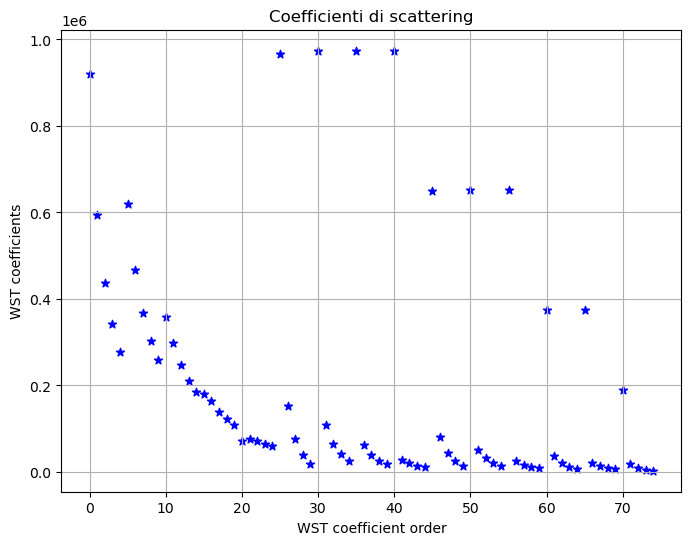

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(np.arange(75), torch.flatten(Sx,start_dim=0), marker="*", color="Blue")
plt.grid()
plt.xlabel("WST coefficient order")
plt.ylabel("WST coefficients")
plt.title("Coefficienti di scattering");

In [8]:
a_J0 = Sx[:,0]
a_J1 = Sx[:,1]
a_J2 = Sx[:,2]
a_J3 = Sx[:,3]
a_J4 = Sx[:,4]


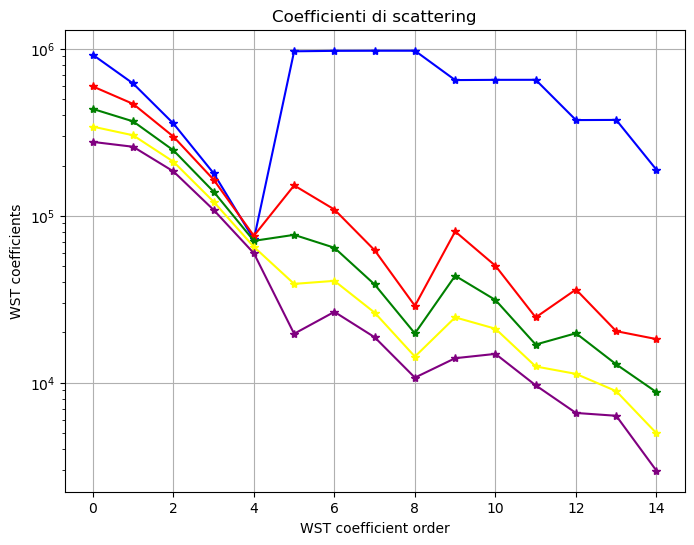

In [9]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(15), a_J0, marker="*", color="Blue")
plt.plot(np.arange(15), a_J1, marker="*", color="Red")
plt.plot(np.arange(15), a_J2, marker="*", color="Green")
plt.plot(np.arange(15), a_J3, marker="*", color="Yellow")
plt.plot(np.arange(15), a_J4, marker="*", color="Purple")
plt.yscale('log')
plt.grid()
plt.xlabel("WST coefficient order")
plt.ylabel("WST coefficients")
plt.title("Coefficienti di scattering");

In [10]:
first_order = []
second_order = []

for i in range(L+1):
    for j in range(J+1):
        first_order.append(Sx[j, i, 0])
    second_order.append(Sx[5:,i,0].numpy())

In [11]:
second_order

[array([966341.3 , 972216.6 , 973677.75, 973950.6 , 649722.94, 651789.94,
        652200.6 , 374288.  , 375086.8 , 188611.98], dtype=float32),
 array([152028.27 , 109031.6  ,  62153.695,  28875.086,  80550.17 ,
         50179.844,  24632.266,  36180.074,  20367.766,  18258.678],
       dtype=float32),
 array([76875.23 , 64348.09 , 38765.75 , 19741.656, 43724.535, 31305.96 ,
        16935.477, 19793.059, 12888.805,  8782.88 ], dtype=float32),
 array([39096.69 , 40761.984, 26295.3  , 14340.131, 24635.773, 21064.574,
        12518.123, 11300.516,  8906.264,  4985.127], dtype=float32),
 array([19653.96  , 26585.846 , 18727.008 , 10731.343 , 14029.512 ,
        14887.346 ,  9650.966 ,  6593.5776,  6341.6123,  2972.5557],
       dtype=float32)]

In [12]:
print("1° order size: ", np.shape(first_order), "   ", type(first_order),
    "\n2° order size: ", np.shape(second_order), "   ", type(second_order))

1° order size:  (25,)     <class 'list'> 
2° order size:  (5, 10)     <class 'list'>


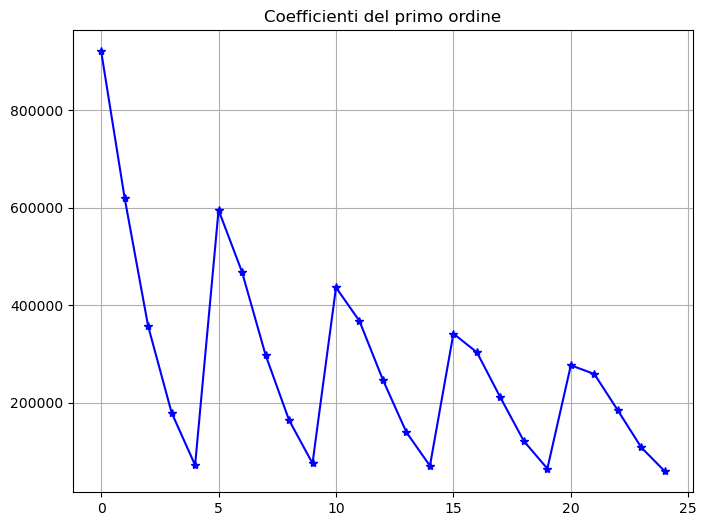

In [13]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(25), first_order, marker="*", color="Blue")
#plt.yscale('log')
plt.grid()
plt.title("Coefficienti del primo ordine");

    I picchi sono in corrispondenza dei valori di L. Ogni valore di L produce 5 coefficienti di scattering, ognuno con un valore crescente di J. I minimi sono quindi i coefficienti che corrispondono a J=4.

In [14]:
a1_J0 = []
a1_J1 = []
a1_J2 = []
a1_J3 = []
a1_J4 = []
    

In [15]:
for i in range(0, np.shape(first_order)[0]-1, 5):
    a1_J0.append(first_order[i])
    a1_J1.append(first_order[i+1])
    a1_J2.append(first_order[i+2])
    a1_J3.append(first_order[i+3])
    a1_J4.append(first_order[i+4])

## First order graph

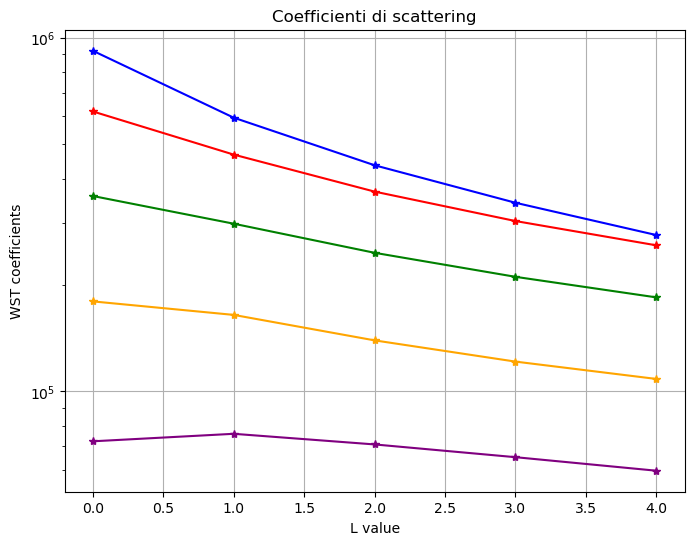

In [16]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(5), a1_J0, marker="*", color="Blue")
plt.plot(np.arange(5), a1_J1, marker="*", color="Red")
plt.plot(np.arange(5), a1_J2, marker="*", color="Green")
plt.plot(np.arange(5), a1_J3, marker="*", color="Orange")
plt.plot(np.arange(5), a1_J4, marker="*", color="Purple")
plt.yscale('log')
plt.grid()
plt.xlabel("L value")
plt.ylabel("WST coefficients")
plt.title("Coefficienti di scattering");

## Second order graph

In [17]:
from mpl_toolkits import mplot3d

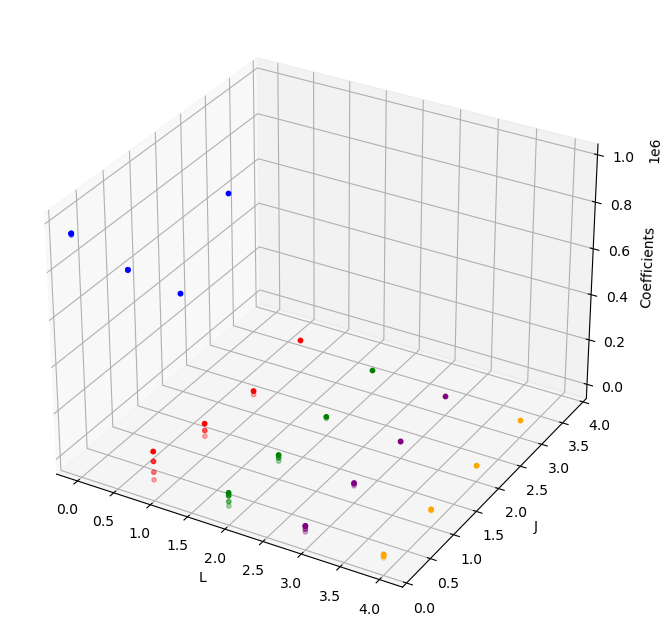

In [18]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
cols = ("Blue", "Red", "Green", "Purple", "Orange", "Black", "Gray")

for l in range(L+1):
    var_a,var_b = 0, 0
    for j_1 in range(J):
#        for j_2 in range(j_1+1, J+1):
        if j_1 != J-1: 
            # ax.scatter3D(l, j_1, second_order[j_1*J:(j_1+1)*J-j_1], color=cols[l], s=20)
            #print("Hello world")
            var_b = var_a+J-j_1
            ax.scatter3D(l, j_1, second_order[l][var_a:var_b], color=cols[l], s=10)
            # if l == 0:
                # print(var_a, " ", var_b)
                # print(len(second_order[l][var_a:var_b]))
            
            var_a = var_b
        else:
            ax.scatter3D(l, j_1, second_order[l][len(second_order)-1], color=cols[l] , s=10)

ax.set_ylim3d(0, 4)
ax.set_xlabel('L')
ax.set_ylabel('J')
# ax.set_zscale('log')
ax.set_zlabel('Coefficients');

I valori per l=0 sono molto vicini tra loro a parità di j.